<a href="https://colab.research.google.com/github/gudals6676/Python/blob/master/01_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%8F%90%EC%95%94%ED%99%98%EC%9E%90_%EC%83%9D%EC%A1%B4%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 폐암 환자의 생존을 예측하는 모델을 만들어보자!
- 신경망을 활용하여 2진 분류 문제를 해결해보자!


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# header : 데이터프레임에서 컬럼명을 설정해주는 함수(None : 인덱스 번호로 컬럼명이 설정됨)
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/data/ThoraricSurgery.csv",
                   header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [36]:
data.shape

(470, 18)

In [37]:
# 문제, 정답 분리하기
y = data[17]
X = data.iloc[:,:17]

In [38]:
X.shape, y.shape

((470, 17), (470,))

In [39]:
c = data[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

In [40]:
#학습, 평가 데이터 설정
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state=5
                                                    )

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 17)
(141, 17)
(329,)
(141,)


### keras를 활용하여 딥러닝 신경망을 구성해보자!
- 1. 신경망 구조 설계
- 2. 학습/평가방법 설정
- 3. 학습 + 시각화
- 4. 모델 평가

In [43]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential     # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성

In [49]:
# 1. 신경망 구조 설계
md = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation : 활성화 함수를 설정(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
md.add(Dense(10, input_dim= 17, activation= "sigmoid"))

# 중간층
md.add(Dense(5, activation="sigmoid"))  # 하나의 층
md.add(Dense(3, activation="sigmoid"))  # 하나의 층

# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(1, activation="sigmoid"))

md.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                180       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


### 활성화 함수 : 자극에 대한 반응여부를 결정하는 함수
- 회귀 : linear(항등함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
- 분류 : 딥러닝은 선형회귀 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치 값으로는 분류 문제를 예측하기 힘듦
  - 2진분류 : sigmoid 함수(0.5를 기준으로 0 or 1 분류, 0인지 1인지를 확률 정보를 통해서 예측) 

In [50]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="binary_crossentropy",
           optimizer = "SGD",          #최적화함수 : 확률적 경사하강법 사용
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [51]:
h = md.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8414 - acc: 0.1459
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8078 - acc: 0.1459
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7781 - acc: 0.1459
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7507 - acc: 0.1459
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7256 - acc: 0.1459
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7032 - acc: 0.2067
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6823 - acc: 0.8511
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6631 - acc: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6452 - acc: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6295 - acc: 0.8541
Epoch 11/100
11/11 [==============================] - 0s 2m

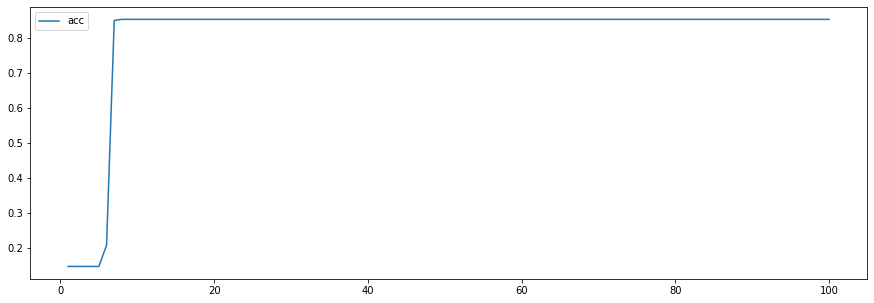

In [52]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 101, 1),
         h.history['acc'],
         label='acc'
         )

plt.legend()
plt.show()

In [53]:
# 모델 평가
md.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4335 - acc: 0.8440


[0.43354934453964233, 0.8439716100692749]